# Fingerprint Feature Extraction and Matching

A biometrics system uses computer technology to identify people based on physical characteristics such as fingerprint.

Biometrics in general is a science that applied statistical and mathematical methods to data analysis problems in the biological sciences.

### In this project, I worked on fingerprint dataset and apply some operations to extract useful information.

#### Prepare the environment and import libraries

In [1]:
import numpy as np
import pandas as pd
import imageio
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

#### Display random images from data

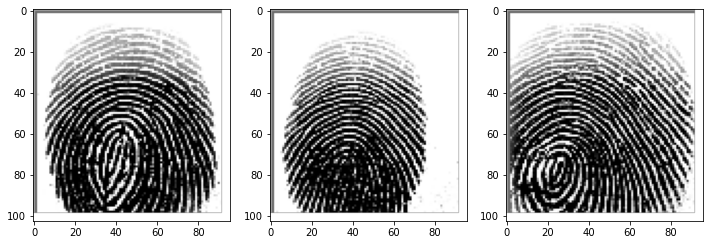

In [2]:
img1 = imageio.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP')
img2 = imageio.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_little_finger.BMP')
img3 = imageio.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_middle_finger.BMP')

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].imshow(img1);
axes[1].imshow(img2); 
axes[2].imshow(img3); 


## Image Processing

#### We will perform some operations on an image (Left_index_finger) to extract some useful information from it

#### Convert image to gray scale

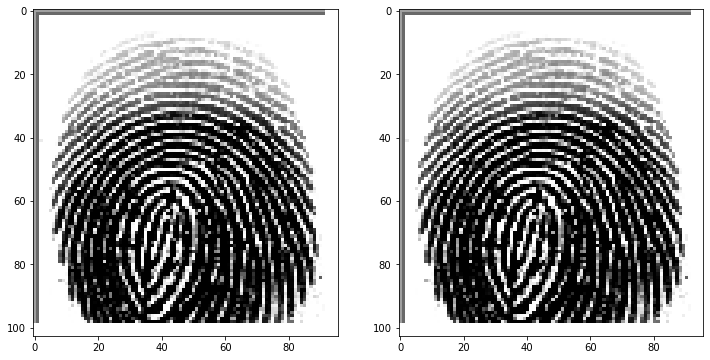

In [3]:
originalimg = imageio.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP')
grayimg = cv2.cvtColor(originalimg, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].imshow(originalimg);
axes[1].imshow(grayimg);

#### Image filtering
Perform useful functions, such as noise removal and image enhancement.

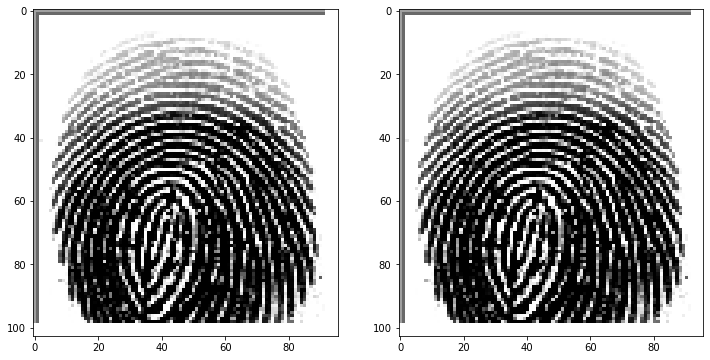

In [4]:
# apply gaussian filter
gaussian_blur = cv2.GaussianBlur(grayimg, (1,1), 0)

fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].imshow(grayimg);
axes[1].imshow(gaussian_blur);

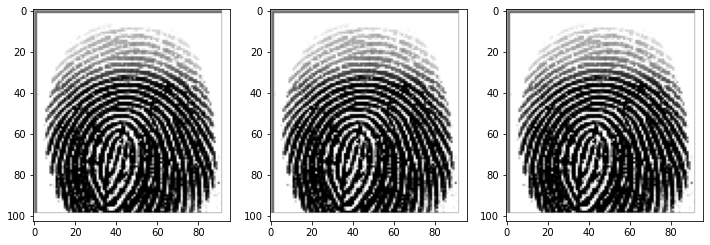

In [5]:
# apply median filter which computes the median of all the pixels under the kernel window 
# and the central pixel is replaced with this median value.

median_blur = cv2.medianBlur(grayimg,1)

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].imshow(grayimg);
axes[1].imshow(median_blur);
axes[2].imshow(gaussian_blur);

## Feature Extraction

Feature Is an interesting part of an image, and are used as a starting point for many computer vision algorithms.

So, we need feature detection befor extraction to know these interesting points which distinguish the image like:

### 1- Edges: 
       Local changes of intensity which occur on the boundary between two different regions in an image.
       Helps in extracting information and recognizing objects.

Text(0.5, 1.0, 'Edge Image')

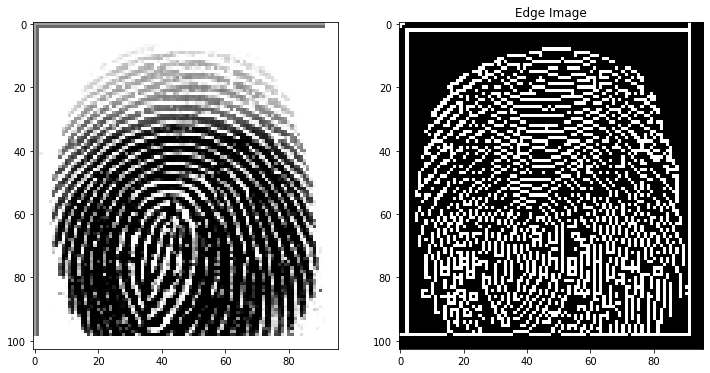

In [6]:
# edge detection using canny detector
edges = cv2.Canny(originalimg,100,200)

fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].imshow(originalimg,cmap = 'gray');
plt.title('Original Image')
axes[1].imshow(edges,cmap = 'gray');
plt.title('Edge Image')

### 2- Corners:
          Regions in images which have maximum variation when moved in all regions around it.

In [7]:
# apply Shi-Tomasi corner detection
img = cv2.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,(255,0,0),-1)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# BRIEF is a faster method feature descriptor only, so we need to apply detector firstly
img = cv2.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP', cv2.IMREAD_GRAYSCALE)
# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()
# find the keypoints with STAR
kp = star.detect(img,None)

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
img2=cv2.drawKeypoints(img,kp,None)
cv2.imshow('brief',img2);
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance
img = cv2.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP', cv2.IMREAD_GRAYSCALE)
# Initiate STAR detector
orb = cv2.ORB_create(20)
kp = orb.detect(img, None)

# compute the descriptors with ORB
des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,None,color=(255,0,0))
cv2.imshow('ORB',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### After we extracted some features through edge detection and corner detection and description

## Let's match between the real image and an altered image!

Altered image was synthetically altered version with central rotation.

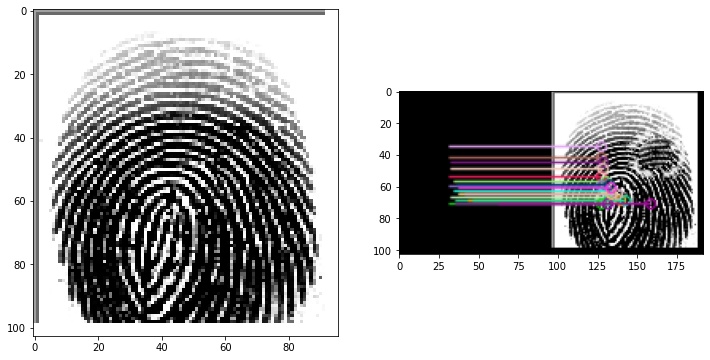

In [10]:
# read the real fingerprint and the altered fingerprint with central rotation
realimg = imageio.imread('D:\Biometrics Project\SOCOFing\Real\sample\Left_index_finger.BMP')
alteredimg = imageio.imread('D:\Biometrics Project\SOCOFing\Real\Sample\Left_index_finger_CR.BMP')

# create the detector
orb = cv2.ORB_create()

# detect keypoints and descriptors of the both images
kp1,des1 = orb.detectAndCompute(realimg, None)
kp2,des2 = orb.detectAndCompute(alteredimg, None)

# create brute-force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# find matches between the two images
matches = bf.match(des1, des2)

# sort matches according to their distances
matches = sorted(matches, key=lambda x:x.distance)

# draw first 20 matches
result = cv2.drawMatches(realimg, kp1, alteredimg, kp2, matches[:20], None, flags=2)

# show images
fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].imshow(realimg);
axes[1].imshow(result); 